In [146]:
import numpy as np #numerical operations
import pandas as pd # data manipulation
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

import warnings 
warnings.filterwarnings("ignore")

In [147]:
anime = pd.read_csv("anime.csv")

In [148]:
anime.head() #first five rows of data

,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,28,Currently Airing,"Sep 29, 2023 to Mar 2024",Fall 2023,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...","None found, add some",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity)
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity)


We only take the first half as I found that the data becomes repetitive after half of it.

In [149]:
anime=anime.head(5000)

# Data Description 

This dataset comprises inormation on top-rated anime sourced from the populer website MyAnimeList.
The data pertains to the year 2024.

We will examine the data then visualize it and draw various conlusions from the data.

In [150]:
df = anime.copy()

In [151]:
df.shape

(5000, 15)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       5000 non-null   object 
 1   Score       5000 non-null   float64
 2   Vote        5000 non-null   int64  
 3   Ranked      5000 non-null   int64  
 4   Popularity  5000 non-null   int64  
 5   Episodes    5000 non-null   object 
 6   Status      5000 non-null   object 
 7   Aired       5000 non-null   object 
 8   Premiered   2439 non-null   object 
 9   Producers   5000 non-null   object 
 10  Licensors   5000 non-null   object 
 11  Studios     5000 non-null   object 
 12  Source      5000 non-null   object 
 13  Duration    5000 non-null   object 
 14  Rating      5000 non-null   object 
dtypes: float64(1), int64(3), object(11)
memory usage: 586.1+ KB


In [153]:
df[["Score","Vote"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Score,5000.0,7.422216,0.447132,6.8,7.08,7.33,7.67,9.14
Vote,5000.0,85409.985400,200202.516029,109.0,4684.75,19432.50,73414.75,2745016.00


#### Coeffiecient Of Variations 

The Coefficient of Variation, expressed as a percentage, measures the variability of a dataset by comparing the standard deviation to the mean, providing insight into the relative dispersion of values.

In [154]:
coeffiecient_of_variations = df["Score"].std() / df["Score"].mean()
print(coeffiecient_of_variations*100)

6.024238723714782


# Source of The Series

In [155]:
dif_source = df['Source'].unique()
print(dif_source)

['Manga' 'Visual novel' 'Novel' 'Original' 'Light novel' '4-koma manga'
 'Web manga' 'Web novel' 'Game' 'Other' 'Mixed media' 'Book' 'Unknown'
 'Music' 'Picture book' 'Card game']


### Visualization

In [156]:
source_type = df['Source'].value_counts()
print(source_type)

Manga           2191
Original        1010
Light novel      541
Novel            258
Game             240
Web manga        172
Visual novel     133
4-koma manga     123
Unknown          106
Other             83
Web novel         45
Mixed media       40
Book              32
Music             10
Card game          9
Picture book       7
Name: Source, dtype: int64


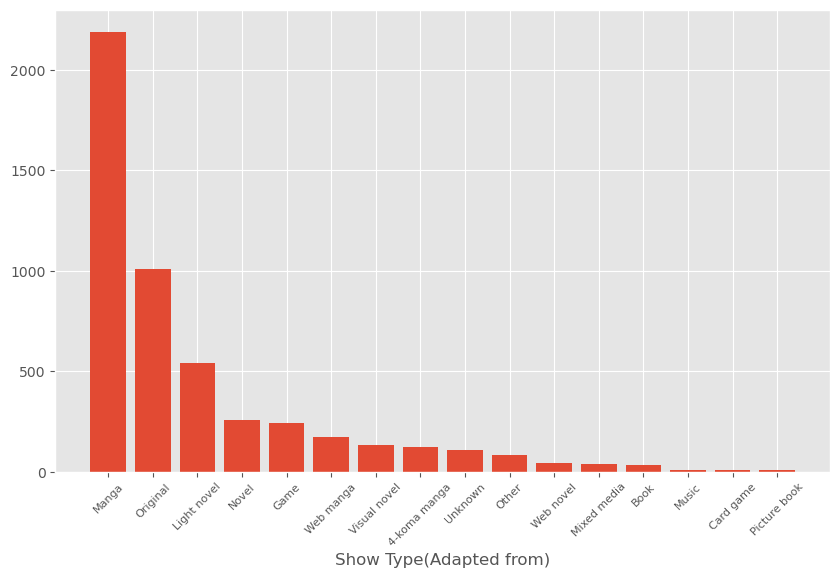

In [157]:
plt.figure(figsize=(10,6))
plt.xticks(fontsize=8, rotation=45)
plt.bar(source_type.index,source_type)
plt.xlabel("Show Type(Adapted from)")
plt.show()

In [158]:
studio=df['Studios'].value_counts().head(15)
print(studio)


Toei Animation          289
Sunrise                 261
J.C.Staff               200
Madhouse                183
Studio Deen             163
TMS Entertainment       162
Production I.G          161
A-1 Pictures            142
Pierrot                 122
Bones                   106
Shin-Ei Animation        94
None found, add some     88
Kyoto Animation          84
Nippon Animation         75
OLM                      73
Name: Studios, dtype: int64


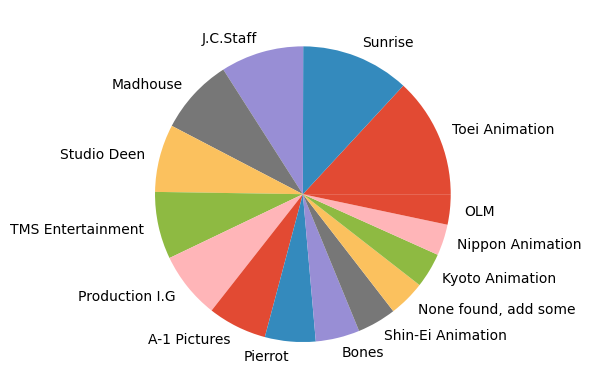

In [159]:
plt.pie(studio,labels=studio.index)
plt.show()

# Most Successful Studio

In [160]:

studio_score = df[['Studios','Score']]
print(studio_score)

                                 Studios  Score
0                               Madhouse   9.14
1                                  Bones   9.09
2                              White Fox   9.07
3                  Bandai Namco Pictures   9.06
4                             Wit Studio   9.05
...                                  ...    ...
4995                        A-1 Pictures   6.81
4996                        SILVER LINK.   6.81
4997                            Madhouse   6.81
4998  Triangle Staff,       animate Film   6.81
4999                             CG Year   6.81

[5000 rows x 2 columns]


In [161]:

studio_score_list = {}
data = []

# DataFrame üzerinde iterasyon yaparak her satırın skorlarını toplama
for index, row in df.iterrows():
    studio = row['Studios']
    score = row['Score']
    
    
    if studio not in studio_score_list:
        studio_score_list[studio] = {'total_score': 0, 'total_series': 0}
        
    
    studio_score_list[studio]['total_score'] += score
    studio_score_list[studio]['total_series'] += 1

for studio, scores in studio_score_list.items():
    data.append([studio, scores['total_score'], scores['total_series']])

# DataFrame oluşturma
df_studio_scores = pd.DataFrame(data, columns=['Studios', 'Total_Score', 'Total_Series'])
print(df_studio_scores)    



                                Studios  Total_Score  Total_Series
0                              Madhouse      1378.47           183
1                                 Bones       806.09           106
2                             White Fox       210.69            27
3                 Bandai Namco Pictures       248.59            32
4                            Wit Studio       346.78            45
..                                  ...          ...           ...
540                      Namu Animation         6.82             1
541                Staple Entertainment         6.81             1
542               Ordet,       SANZIGEN         6.81             1
543                   Knack Productions        13.62             2
544  Triangle Staff,       animate Film         6.81             1

[545 rows x 3 columns]


In [162]:
df_studio_scores['Studio Score']= None
for index,row in df_studio_scores.iterrows():
    df_studio_scores.at[index,'Studio Score']=row['Total_Score']/row['Total_Series']


In [163]:
df_studio_scores = df_studio_scores.sort_values(by='Studio Score', ascending=False)
print(df_studio_scores)

                                              Studios  Total_Score  \
8           K-Factory,       Kitty Film Mitaka Studio         9.02   
16   Toei Animation,       DandeLion Animation Studio         8.81   
17                   OLM,       TOHO animation STUDIO         8.80   
14                     Pierrot,       Studio Signpost        17.55   
29                                OLM,       P.I.C.S.         8.67   
..                                                ...          ...   
540                                    Namu Animation         6.82   
541                              Staple Entertainment         6.81   
542                             Ordet,       SANZIGEN         6.81   
543                                 Knack Productions        13.62   
544                Triangle Staff,       animate Film         6.81   

     Total_Series Studio Score  
8               1         9.02  
16              1         8.81  
17              1          8.8  
14              2        8.

Let's eliminate series where multiple studios collaborate

In [164]:
filtered_data = df_studio_scores[~df_studio_scores['Studios'].str.contains(',')]
print(filtered_data)

                      Studios  Total_Score  Total_Series Studio Score
64                   Topcraft         8.35             1         8.35
68   Nippon Ramayana Film Co.         8.34             1         8.34
75            Sharefun Studio        16.45             2        8.225
85                     Imagin         8.22             1         8.22
88   Samsara Animation Studio         8.20             1          8.2
..                        ...          ...           ...          ...
537    Kung Fu Frog Animation         6.83             1         6.83
539               Studio Flag         6.82             1         6.82
540            Namu Animation         6.82             1         6.82
541      Staple Entertainment         6.81             1         6.81
543         Knack Productions        13.62             2         6.81

[329 rows x 4 columns]


Although there is not enough data analysis to find the most successful studio, we see the studios with the highest average scores per series.

# Is the most popular series the best series?

In [165]:

df_anime_popularity = df.sort_values(by='Popularity', ascending=True)
print(df_anime_popularity.head(10))

                                               Title  Score     Vote  Ranked  \
110                Shingeki no KyojinAttack on Titan   8.54  2745016     111   
76                                        Death Note   8.62  2696520      81   
1                   Fullmetal Alchemist: Brotherhood   9.09  2080863       2   
126                                    One Punch Man   8.50  2194048     128   
3164                                Sword Art Online   7.20  2118375    3168   
805            Boku no Hero AcademiaMy Hero Academia   7.87  2032379     806   
136   Kimetsu no YaibaDemon Slayer: Kimetsu no Yaiba   8.48  2036434     136   
623                                           Naruto   7.99  1939112     624   
969                                      Tokyo Ghoul   7.79  1836426     970   
6              Hunter x Hunter (2011)Hunter x Hunter   9.04  1718520       7   

      Popularity Episodes           Status                        Aired  \
110            1       25  Finished Airing  

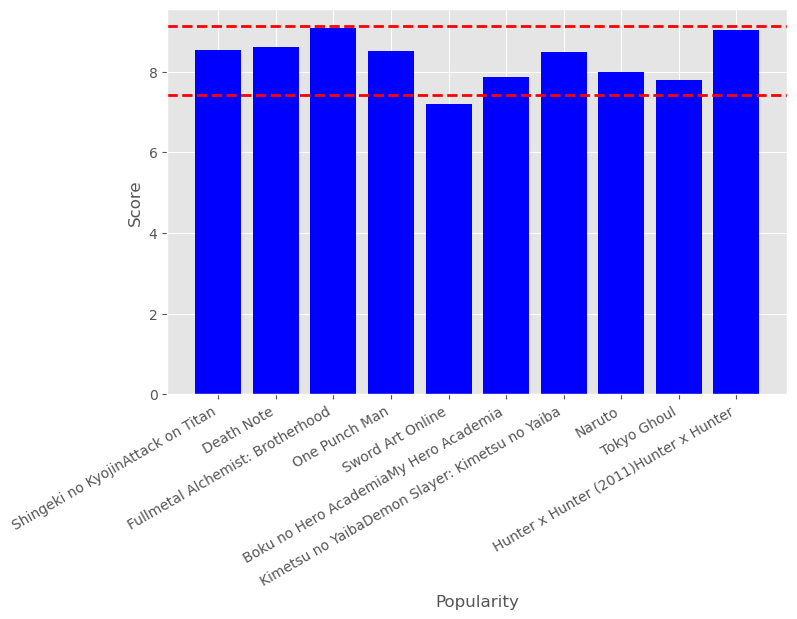

In [177]:
xaxis=df_anime_popularity.head(10)['Popularity']
yaxis=df_anime_popularity.head(10)['Score']
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.bar(xaxis,yaxis,color='blue')
plt.xlabel('Popularity')
plt.ylabel('Score')
titles = df_anime_popularity.head(10)['Title']
plt.xticks(xaxis, titles, rotation=30, ha='right')
mean_score=df['Score'].mean()
plt.axhline(y=mean_score, color='red', linestyle='--', linewidth=2, label=f'Score Line: {mean_score}')
max_score = df['Score'].max()
max_score = df['Score'].max()
plt.axhline(y=max_score, color='red', linestyle='--', linewidth=2, label=f'Score Line: {max_score}')


plt.show()


In general, we found that the popularity of a series is higher than average.